## setup

In [30]:
# imports
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse
from q_dms_ttr_paper.paths import DATA_PATH
from q_dms_ttr_paper.titration import compute_mg_1_2, normalize_data, normalized_hill_equation

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [31]:
df_wt_mg = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df_wt_buff = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")
df_mttr6_muts = pd.read_json(f"{DATA_PATH}/processed/mttr6_muts_titra.json")
df_mttr6_full = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")

### style functions

In [32]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)
    for line in ax.get_xticklines():
        line.set_visible(True)
    ax.xaxis.set_ticks_position('bottom')  # Show x axis ticks only on bottom
    ax.yaxis.set_ticks_position('left')  # Show y axis ticks only on left
    # Set the length of the ticks (in points)
    ax.tick_params(axis='both', which='major', length=4)
    ax.tick_params(axis='both', which='minor', length=4)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())



def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)


def publication_line(ax, x, y, **kwargs):
    ax.plot(x, y, markersize=10, lw=2, **kwargs)

### plotting functions

In [33]:
def publication_titration_plot(g, name, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    mg_conc = list(g["mg_conc"])
    data = list(g["gaaa_avg"])
    r = compute_mg_1_2(mg_conc, data)
    norm_data = normalize_data(data)
    plt.scatter(g["mg_conc"], norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 40, 0.01):
        p = r[0]
        y = normalized_hill_equation(j, p[0], p[1])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, label=name, lw=3)

## data info

In [34]:
df_wt_mg["df_type"] = "df_wt_mg"
df_wt_buff["df_type"] = "df_wt_buff"
df_mttr6_muts["df_type"] = "df_mttr6_muts"
df_all = pd.concat([df_wt_mg, df_wt_buff, df_mttr6_muts])
# print all unique combos between run_name and exp_name
df_all.groupby(['df_type', 'run_name', 'exp_name', 'name']).count()

sequence  \
df_type       run_name                                 exp_name                                       name                                      
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                 16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed          16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed        16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed               16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed              16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed        16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed        16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                     8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07_25_C0117_NaC_Hep_titra_CM_BL           minittr-6-2HP-ref                    12   
                                                       2022_07_26_C0117_KCl_Tris_titra_CM_BL          minittr-6-2HP-ref                    12   
df_wt_mg      2022_07_27_minittr_50mM_NaC_Mg_titra_seq 2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM        minittr-6-2HP-ref                    15   
              2022_07_28_minittr_0.1M_NaC_Mg_titra_seq 2022_07_28_C0117_100mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_07_29_minittr_0.15M_NaC_Mg_titr_seq 2022_07_29_C0117_150mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_09_minittr_0.2M_NaC_Mg_titra_seq 2022_08_08_C0117_200mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_10_minittr_0.25M_NaC_Mg_titr_seq 2022_08_09_C0117_250mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_11_minittr_0.3M_NaC_Mg_titra_seq 2022_08_10_C0117_300mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   

                                                                                                                                     structure  \
df_type       run_name                                 exp_name                                       name                                       
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                  16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed           16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed         16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed                16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed               16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed         16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed         16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                      8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07

## plots

In [35]:
df_wt = df_wt_mg[df_wt_mg["run_name"] == "2022_07_27_minittr_50mM_NaC_Mg_titra_seq"]
df_uucg = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_uucg_fixed"]
df_notlr = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_no_tlr_fixed"]

In [36]:
data = [
    ["df_wt", len(df_wt), "WT"],
    ["df_uucg", len(df_uucg), "UUCG"],
    ["df_notlr", len(df_notlr), "No TLR"],
]
print(data)

[['df_wt', 15, 'WT'], ['df_uucg', 16, 'UUCG'], ['df_notlr', 16, 'No TLR']]


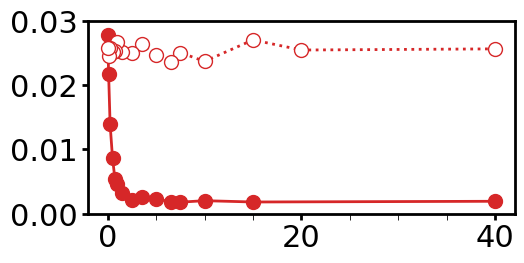

In [37]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['gaaa_avg'], marker='o', color='tab:red')
publication_line(ax, df_notlr['mg_conc'], df_notlr['gaaa_avg'], marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:red')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02,0.03]);


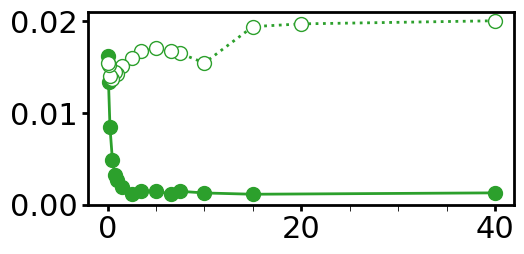

In [38]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 4
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:green')
publication_line(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:green')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02]);

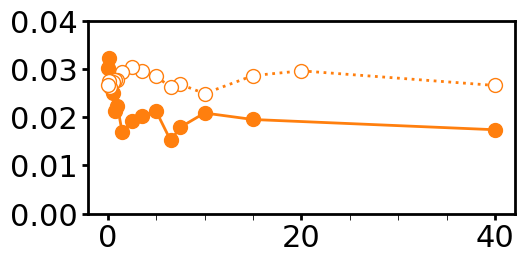

In [39]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 5
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:orange')
publication_line(ax, df_uucg['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:orange')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
ax.set_yticks([0.0, 0.01,0.02, 0.03, 0.04]);

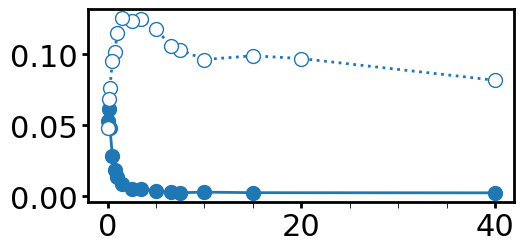

In [40]:
fig, ax = plt.subplots(figsize=(5.5, 2.5))
POS = 8
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='tab:blue')
publication_line(ax, df_notlr['mg_conc'], df_uucg['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='white', 
                 linestyle=':', color='tab:blue')
#ax.set_ylabel("Average mutation fraction")
#ax.set_xlabel("Mg    concentration (mM)")
#ax.legend()
#ax.set_yticks([0.0, 0.02,]);